# 8.1

In [216]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

%matplotlib inline

In [217]:
sample_size = 100
alpha = 0.95

x = np.arange(1, sample_size + 1)
N = 100

In [218]:
N = 100
def f(X_1, X_2, k):
    P_10 = 0
    P_100 = 0
    for i in range(N):
        if (k == 1):
            sample = st.uniform.rvs(0, 1, size = sample_size)
        if (k == 2):
            sample = st.cauchy(1).rvs(size = sample_size)
        if(k == 3):
            sample = st.poisson(1).rvs(size = sample_size)
            print(sample[9])
        if (k == 4):
            sample = st.gamma(10, 1).rvs(size = sample_size)
            
        if (sample[9] > X_1[9] and sample[9] < X_2[9]):
            P_10 += 1
        if (sample[99] > X_1[99] and sample[99] < X_2[99]):
            P_100 += 1
    return [P_10 / N * 100, P_100 / N * 100]

In [220]:
def uniform_func():    
    sample = st.uniform.rvs(0, 1, size = sample_size)
    X_ave_1 = np.zeros(sample_size)
    X_ave_2 = np.zeros(sample_size)
    X_1 = np.zeros(sample_size)
    X_n = np.zeros(sample_size)
    for i in range(sample_size):
        X_ave_1[i] = sum(sample[:i+1]) / x[i] / (1/2 + (12 * (alpha) * x[i]) ** (-1/2) ) 
        X_ave_2[i] = sum(sample[:i+1]) / x[i] / (1/2 - (12 * (alpha) * x[i]) ** (-1/2) ) 
        X_1[i] = st.tmin(sample[:i+1]) 
        X_n[i] = st.tmax(sample[:i+1]) 
    
    plt.figure(figsize=(15, 8))
    plt.plot(x, np.ones(sample_size), color='brown', label='theta')
    
    plt.fill_between(x, X_ave_1, X_ave_2, alpha=0.1, color='green', label='(1) - $\overline{X}$')
    plt.fill_between(x, X_1, X_1 / (1 - alpha**(1/x)), alpha=0.1, color='blue', label='(2) - $X_{(1)}$')
    plt.fill_between(x, X_n, X_n / ((1 - alpha)**(1/x)), alpha=0.1, color='red', label='(3) - $X_{(n)}$')
    plt.title('R[0,1]')
    plt.legend()
    plt.xlim((1, 100))  
    plt.ylim((-1, 3))  
    plt.grid()
    plt.show()
    
    P_10 = np.zeros(3)
    P_100 = np.zeros(3)
    for i in range(N):
        sample = st.uniform.rvs(0, 1, size = sample_size)
        for i in range(sample_size):
            X_ave_1[i] = sum(sample[:i+1]) / x[i] / (1/2 + (12 * (alpha) * x[i]) ** (-1/2) ) 
            X_ave_2[i] = sum(sample[:i+1]) / x[i] / (1/2 - (12 * (alpha) * x[i]) ** (-1/2) ) 
            X_1[i] = st.tmin(sample[:i+1]) 
            X_n[i] = st.tmax(sample[:i+1]) 
        if (1 > X_ave_1[9] and 1 < X_ave_2[9]):
            P_10[0] += 1
        if (1 > X_ave_1[99] and 1 < X_ave_2[99]):
            P_100[0] += 1
        if (1 > X_1[9] and 1 < (X_1 / (1 - alpha**(1/x)))[9]):
            P_10[1] += 1
        if (1 > X_1[99] and 1 < (X_1 / (1 - alpha**(1/x)))[99]):
            P_100[1] += 1
        if (1 > X_n[9] and 1 < (X_n / ((1 - alpha)**(1/x)))[9]):
            P_10[2] += 1
        if (1 > X_n[99] and 1 < (X_n / ((1 - alpha)**(1/x)))[99]):
            P_100[2] += 1    
    
    print("Вероятность попадания истинного значения параметра в интервал (1):\n при n = 10: ", 
          int(P_10[0]/N*100), "%\n при n = 100: ", int(P_100[0]/N*100), "%")
    print("Вероятность попадания истинного значения параметра в интервал (2):\n при n = 10: ", 
          int(P_10[1]/N*100), "%\n при n = 100: ", int(P_100[1]/N*100), "%")
    print("Вероятность попадания истинного значения параметра в интервал (3):\n при n = 10: ", 
          int(P_10[2]/N*100), "%\n при n = 100: ", int(P_100[2]/N*100), "%")

Пусть $X_1,...X_n$ - выборка из $R[0, \theta], \theta = 1$. Построим доверительные интервалы уровня доверия $\alpha = 0.95$, используя статистики: $\overline{X}, X_{(1)}, X_{(n)}$:

(1): ($\frac{2\overline{X}}{1 + \frac{2}{\sqrt{12 n \alpha}}}, \frac{2\overline{X}}{1 - \frac{2}{\sqrt{12 n \alpha}}}$)

(2): ($X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}}$)

(3): ($X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}}$)



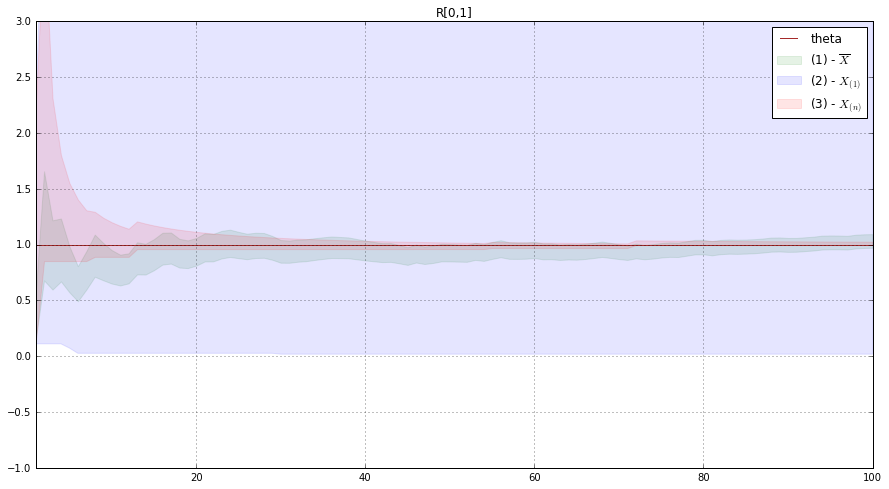

Вероятность попадания истинного значения параметра в интервал (1):
 при n = 10:  61 %
 при n = 100:  74 %
Вероятность попадания истинного значения параметра в интервал (2):
 при n = 10:  96 %
 при n = 100:  99 %
Вероятность попадания истинного значения параметра в интервал (3):
 при n = 10:  91 %
 при n = 100:  91 %


In [221]:
uniform_func()

Из графика видно, что доверительный интервал, построенный с использованием статистики $X_{(n)}$ наиболее точный.

In [222]:
def cauchy_func(sample):
    plt.figure(figsize=(15, 8))
    plt.plot(x, np.ones(sample_size), color='brown', label='theta')
    mediana = np.zeros(sample_size)
    for i in range(1, sample_size):
        sort = sorted(sample[:i+1])
        if (i % 2 == 0):
            mediana[i] = (sort[int(i/2)] + sort[int(i/2) + 1])/2
        else:
            mediana[i] = sort[int(i/2) + 1]
    
    plt.fill_between(x, mediana + 3.14 * st.norm.ppf((1 - alpha)/2) / (2* x**(1/2)), mediana 
                     + 3.14 * st.norm.ppf((1 + alpha)/2) / (2* x**(1/2)), alpha=0.1, color='green', 
                     label='confidence interval')
    plt.title('Cauchy(1)')
    plt.legend()
    plt.xlim((1, 100))  
    plt.ylim((-3, 5))  
    plt.grid()
    plt.show()
    
    
    P_10 = 0
    P_100 = 0
    for i in range(N):
        sample = st.cauchy(1).rvs(size = sample_size)
        mediana = np.zeros(sample_size)
        for i in range(1, sample_size):
            sort = sorted(sample[:i+1])
            if (i % 2 == 0):
                mediana[i] = (sort[int(i/2)] + sort[int(i/2) + 1])/2
            else:
                mediana[i] = sort[int(i/2) + 1]
        X_1 = mediana + 3.14 * st.norm.ppf((1 - alpha)/2) / (2* x**(1/2))
        X_2 = mediana + 3.14 * st.norm.ppf((1 + alpha)/2) / (2* x**(1/2))
        if (1 > X_1[9] and 1 < X_2[9]):
            P_10 += 1
        if (1 > X_1[99] and 1 < X_2[99]):
            P_100 += 1
            
    print("Вероятность попадания истинного значения параметра в ДИ:\n при n = 10: ", 
          int(P_10/N*100), "%\n при n = 100: ", int(P_100/N*100), "%")

Пусть $X_1,...X_n$ - выборка из $Cauchy(\theta), \theta = 1$. Построим доверительный интервал уровня доверия $\alpha = 0.95$:

($\mu + \frac{u_{\frac{1 - \alpha}{2}} \pi}{2\sqrt{n}}, \mu + \frac{u_{\frac{1 + \alpha}{2}} \pi}{2\sqrt{n}}$)

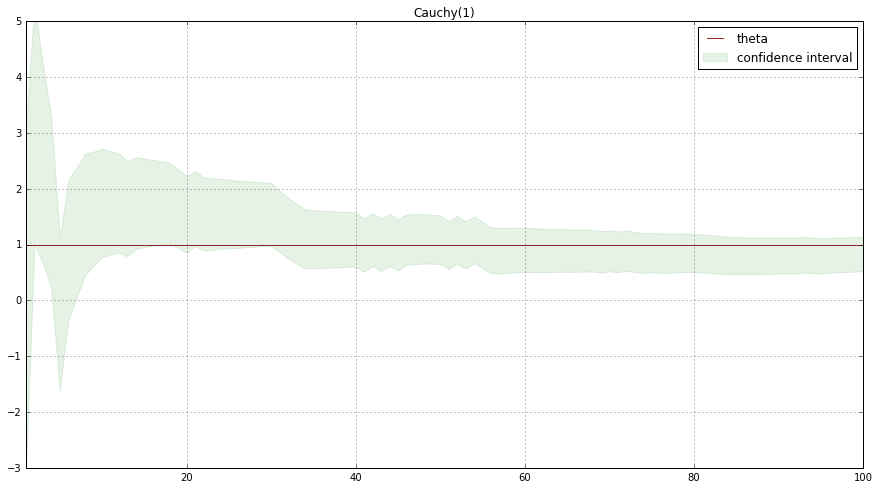

Вероятность попадания истинного значения параметра в ДИ:
 при n = 10:  89 %
 при n = 100:  95 %


In [223]:
sample = st.cauchy(1).rvs(size = sample_size)
cauchy_func(sample)

In [224]:
def poisson_func(sample):
    means = sample.cumsum() / x
    
    plt.figure(figsize=(15, 8))
    plt.plot(x, np.ones(sample_size), color='brown', label='theta')
    plt.fill_between(x, means + means**(1/2) * st.norm.ppf(1/2 - alpha/2) / (x**(1/2)), means +
                     means**(1/2) * st.norm.ppf(1/2 + alpha/2) / (x**(1/2)), alpha=0.1, color='red', label='confidence interval')
   
    plt.legend()
    plt.title('Poisson(1)')
    plt.xlim((1, 100))  
    plt.ylim((-1, 3))  
    plt.grid()
    plt.show()
    
    P_10 = 0
    P_100 = 0
    for i in range(N):
        sample = st.poisson(1).rvs(size = sample_size)
        means = sample.cumsum() / x
        X_1 = means + means**(1/2) * st.norm.ppf(1/2 - alpha/2) / (x**(1/2))
        X_2 = means + means**(1/2) * st.norm.ppf(1/2 + alpha/2) / (x**(1/2))
        if (1 > X_1[9] and 1 < X_2[9]):
            P_10 += 1
        if (1 > X_1[99] and 1 < X_2[99]):
            P_100 += 1
            
    print("Вероятность попадания истинного значения параметра в ДИ:\n при n = 10: ", 
          int(P_10/N*100), "%\n при n = 100: ", int(P_100/N*100), "%")

Пусть $X_1,...X_n$ - выборка из $Poisson(\theta), \theta = 1$. Построим доверительные интервалы уровня доверия $\alpha = 0.95$:

($\overline{X} + \frac{u_{\frac{1 - \alpha}{2}} \sqrt{\overline{X}}}{\sqrt{n}}, \overline{X} + \frac{u_{\frac{1 + \alpha}{2}} \sqrt{\overline{X}}}{\sqrt{n}}$)

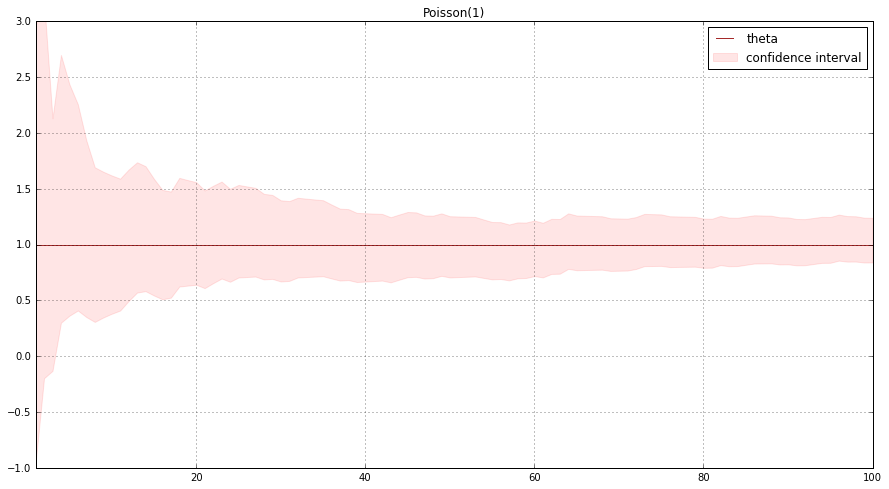

Вероятность попадания истинного значения параметра в ДИ:
 при n = 10:  92 %
 при n = 100:  96 %


In [225]:
sample = st.poisson(1).rvs(size = sample_size)
poisson_func(sample)

In [226]:
def gamma_func():
    sample = st.gamma(10, 1).rvs(size = sample_size)
    means = sample.cumsum() / x
    plt.figure(figsize=(15, 8))
    plt.plot(x, 10 * np.ones(sample_size), color='brown', label='theta')
    
    plt.fill_between(x, means/(1-st.norm.ppf(1/2-alpha/2)*(x**(-1/2))), 
                     means/(1-st.norm.ppf(1/2+alpha/2)*(x**(-1/2))), alpha=0.1, color='blue', label='confidence interval')
    
    
    plt.legend()
    plt.xlim((1, 100))  
    plt.ylim((0, 20))  
    plt.grid()
    plt.show()
    
    P_10 = 0
    P_100 = 0
    for i in range(N):
        sample = st.gamma(10, 1).rvs(size = sample_size)
        means = sample.cumsum() / x
        X_1 = means/(1-st.norm.ppf(1/2-alpha/2)*(x**(-1/2)))
        X_2 = means/(1-st.norm.ppf(1/2+alpha/2)*(x**(-1/2)))
        if (10 > X_1[9] and 10 < X_2[9]):
            P_10 += 1
        if (10 > X_1[99] and 10 < X_2[99]):
            P_100 += 1
            
    print("Вероятность попадания истинного значения параметра в ДИ:\n при n = 10: ", 
          int(P_10/N*100), "%\n при n = 100: ", int(P_100/N*100), "%")

Пусть $X_1,...X_n$ - выборка из $Г(\theta, \lambda), \theta = 10, \lambda = 1$. Построим доверительные интервалы уровня доверия $\alpha = 0.95$ при: а) известном $\lambda$

(а): ($\frac{\overline{X}}{\lambda - u_{\frac{1 - \alpha}{2}}\sqrt{\frac{\lambda}{n}}}, \frac{\overline{X}}{\lambda - u_{\frac{1 +\alpha}{2}}\sqrt{\frac{\lambda}{n}}}$)

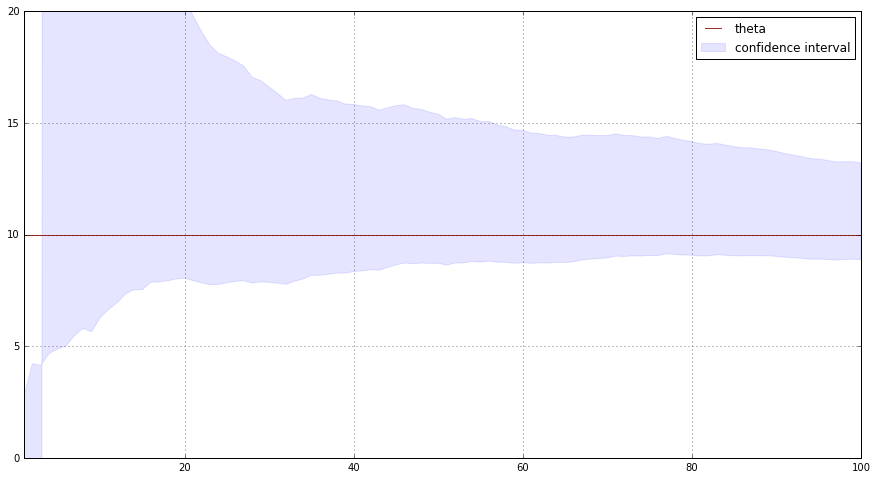

Вероятность попадания истинного значения параметра в ДИ:
 при n = 10:  100 %
 при n = 100:  100 %


In [227]:
gamma_func()